In [1]:
import pandas
import numpy as np
import io
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM


In [2]:
# load the new file
datasett = read_csv('./FB_.csv', header=0)


In [3]:
datasett.head()

,Unnamed: 0,symbol,date,open,high,low,close,volume,adj_close,prev_day_diff,50_day_moving_avg,10_day_volatility,s&p_index_open,s&p_index_high,s&p_index_low,s&p_index_close,s&p_index_volume,s&p_index_adj_close
0,0,FB,2012-05-18,0.020657,0.021838,0.018921,0.018783,573576400,0.018783,0.000000,38.230000,0.000000,1305.050049,1312.239990,1291.979980,1295.219971,4.512470e+09,1295.219971
1,1,FB,2012-05-21,0.017945,0.017791,0.016432,0.016720,168192700,0.016720,-4.200001,36.129999,2.100000,1295.729980,1316.390015,1295.729980,1315.989990,3.786750e+09,1315.989990
2,2,FB,2012-05-22,0.016020,0.016301,0.015406,0.015231,101786600,0.015231,-3.029999,34.419999,3.419999,1316.089966,1328.489990,1310.040039,1316.630005,4.123680e+09,1316.630005
3,3,FB,2012-05-23,0.015411,0.015772,0.015615,0.015722,73600000,0.015722,1.000000,33.814999,1.814999,1316.020020,1320.709961,1296.530029,1318.859985,4.108330e+09,1318.859985
4,4,FB,2012-05-24,0.016187,0.016116,0.015819,0.016228,50237200,0.016228,1.029999,33.657999,0.628000,1318.719971,1324.140015,1310.500000,1320.680054,3.937670e+09,1320.680054


In [4]:
dataset=datasett[['date','adj_close']]

In [5]:
dataset.head()

,date,adj_close
0,2012-05-18,0.018783
1,2012-05-21,0.016720
2,2012-05-22,0.015231
3,2012-05-23,0.015722
4,2012-05-24,0.016228


In [6]:
dataset.shape

(956, 2)

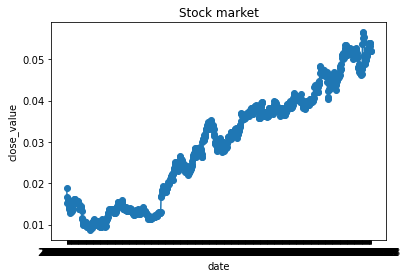

In [7]:
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
from datetime import datetime, timedelta
plt.plot_date(dataset['date'],dataset['adj_close'],linestyle='solid')
plt.xlabel('date')
plt.ylabel('close_value')
plt.title('Stock market')
plt.show()

In [8]:
# split into train and test
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset.values)

In [9]:
# we will create a dataset where X are the real values and y are the next day values (the forecasting to be learned by the model)
def create_dataset(dataset, look_back=1):
	X, y = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 1]
		X.append(a)
		y.append(dataset[i + look_back, 1])
	return array(X), array(y)

In [10]:
# Create a training & testing data where X are the real values and y are the next day values
X_train, y_train = create_dataset(train)
X_test, y_test = create_dataset(test)

In [11]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)

In [12]:
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [14]:
from sklearn.ensemble import RandomForestRegressor
tree=RandomForestRegressor(n_estimators=100).fit(X_train, y_train)

In [15]:
prediction = tree.predict(X_test)
prediction

array([0.04485282, 0.0172114 , 0.01661503, 0.01806923, 0.03006539,
       0.02987258, 0.02368598, 0.02739783, 0.04024643, 0.03509889,
       0.03521779, 0.02351259, 0.01983857, 0.02122118, 0.03862935,
       0.02060837, 0.03537412, 0.0344729 , 0.04312309, 0.03651907,
       0.01618857, 0.04037642, 0.03676239, 0.02985737, 0.02275842,
       0.03702608, 0.02867226, 0.03099713, 0.03246744, 0.02829954,
       0.04149751, 0.03940155, 0.01471516, 0.03809748, 0.03066961,
       0.0349795 , 0.02601462, 0.03648136, 0.03219397, 0.03020355,
       0.02398538, 0.02719354, 0.02929451, 0.0266496 , 0.01578431,
       0.04051316, 0.01980088, 0.02596215, 0.01822341, 0.02628902,
       0.04962505, 0.01791432, 0.01762582, 0.02613967, 0.02577695,
       0.02683959, 0.04142917, 0.01706532, 0.04485282, 0.01829175,
       0.03226762, 0.0331546 , 0.03717062, 0.01914576, 0.03665887,
       0.03040302, 0.03048399, 0.04485527, 0.02613967, 0.03749961,
       0.0351235 , 0.03069461, 0.03876092, 0.01980088, 0.03119

In [16]:
from sklearn.metrics import mean_squared_error
import math

In [17]:
# Get the root mean squared error
math.sqrt(mean_squared_error(y_test, prediction))

0.01732173863212222

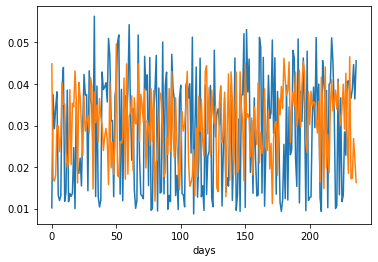

In [18]:
days = ['mon', 'tue', 'wed', 'thr', 'fri', 'sat' , 'sun']
plt.xlabel('days')
pyplot.plot(y_test,)
pyplot.plot(prediction)
pyplot.show()